<h1>Activity 2: UK Road Accident Data Analytics Project</h1>
<hr>
<h3>Analyst : Mery Rose Cablaida</h3>


In [89]:
import numpy as np
import pandas as pd
import folium
from folium.plugins import HeatMap
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


<h3>Converting dataset(s) into Data Frame</h3>

In [90]:
uk = pd.read_csv('datasets\\uk_road_accident.csv')
uk

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h3>Descriptive Analytics</h3>

In [91]:
uk.describe()


,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


<h3>Checking for Null Values</h3>

In [92]:
uk.isnull()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660675,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660676,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660677,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [93]:
uk.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h3>Filling Up Null Values</h3>

In [94]:

uk['Latitude'].mean()
uk['Latitude'] = uk['Latitude'].fillna(uk['Latitude'].mean())

uk['Longitude'].mean()
uk['Longitude'] = uk['Longitude'].fillna(uk['Longitude'].mean())

uk['Road_Surface_Conditions'].mode()
uk['Road_Surface_Conditions'] = uk['Road_Surface_Conditions'].fillna(uk['Road_Surface_Conditions'].mode()[0])

uk['Road_Type'].mode()
uk['Road_Type'] = uk['Road_Type'].fillna(uk['Road_Type'].mode()[0])

uk['Urban_or_Rural_Area'].mode()
uk['Urban_or_Rural_Area'] = uk['Urban_or_Rural_Area'].fillna(uk['Urban_or_Rural_Area'].mode()[0])

uk['Weather_Conditions'].mode()
uk['Weather_Conditions'] = uk['Weather_Conditions'].fillna(uk['Weather_Conditions'].mode()[0])

uk.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h3>Clearing any inconsistencies with the Data Set</h3>

In [95]:
uk['Accident Date'] = uk['Accident Date'].astype('str')
uk['Accident Date'] = uk['Accident Date'].str.strip()
uk['Accident Date'] = uk['Accident Date'].str.replace('/','-')

In [96]:
uk['Accident Date'] = pd.to_datetime(uk['Accident Date'], dayfirst = True, errors = 'coerce')

<h3>Extracting Date information using pandas date time</h3>

In [97]:
uk['Year'] = uk['Accident Date'].dt.year
uk['Month'] = uk['Accident Date'].dt.month
uk['Day'] = uk['Accident Date'].dt.day
uk['DayOfWeek'] = uk['Accident Date'].dt.dayofweek

In [98]:
uk.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h3>Changing the Data Type</h3>

In [99]:
uk.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [100]:
uk['Index']= uk['Index'].astype('category')
uk['Accident_Severity']= uk['Accident_Severity'].astype('category')
uk['Accident Date']= uk['Accident Date'].astype('category')
uk['Light_Conditions']= uk['Light_Conditions'].astype('category')
uk['District Area']= uk['District Area'].astype('category')
uk['Road_Surface_Conditions']= uk['Road_Surface_Conditions'].astype('category')
uk['Road_Type']= uk['Road_Type'].astype('category')
uk['Urban_or_Rural_Area']= uk['Urban_or_Rural_Area'].astype('category')
uk['Weather_Conditions']= uk['Weather_Conditions'].astype('category')
uk['Vehicle_Type']= uk['Vehicle_Type'].astype('category')

uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h1>What Is Data Visualization?</h1>
<hr>
<h3>“The representation of information in the form of a chart, diagram, picture, etc.”</h3>

<h6>
Use a simple bar chart showing the number of accidents per year (2019–2022) to illustrate how raw numbers become instantly understandable when visualized.
</h6>

<h1>Why Is It Important?</h1>
<ul>
    <li><h4>Helps identify patterns, trends, and outliers.</h4> </li>
    <li><h4>Speeds up decision-making.</h4></li>
    <li><h4>Makes data accessible to non-technical stakeholders.</h4></li>
</ul>

<h4>
📊 Example Visualization: Line chart showing monthly accident trends over time. This reveals seasonal spikes (e.g., winter months, holidays).
</h4>

<h1>Types of Visualizations (with Dataset Examples)</h1>
<table>
    <tr>
        <th>
            Visualization Type
        </th>
        <th>
            UK Dataset Example
        </th>
        <th>
            Purpose
        </th>
    </tr>
    <tr>
        <td>
            Histogram
        </td>
        <td>
            Distribution of accident severity
        </td>
        <td>
            Show frequency of severity levels
        </td>
    </tr>
    <tr>
        <td>
            Heatmap
        </td>
        <td>
            Accidents by region vs. time of day
        </td>
        <td>
            Reveal hotspots and peak hours
        </td>
    </tr>
    <tr>
        <td>
            Box Plot
        </td>
        <td>
            Casualty age distribution
        </td>
        <td>
            Spot outliers and age concentration
        </td>
    </tr>
    <tr>
        <td>
            Pie Chart
        </td>
        <td>
            Proportion of accident causes
        </td>
        <td>
            Show relative contribution
        </td>
    </tr>
    <tr>
        <td>
            Stacked Bar Chart
        </td>
        <td>
            Road type vs. lighting condition
        </td>
        <td>
            Compare accident counts across categories
        </td>
    </tr>
</table>

<h1>Univariate Plotting </h1>
<h2>Focus on one variable at a time.</h2>

<h4>📌 Example: Histogram of vehicle types involved </h4>


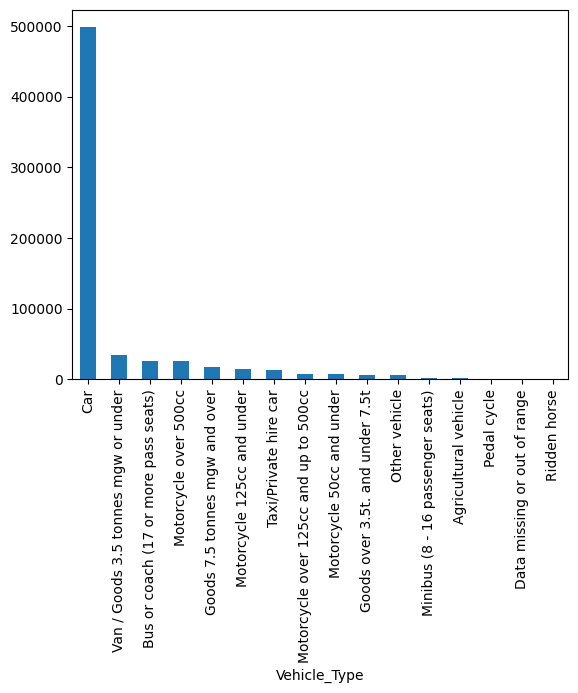

In [101]:

uk['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()


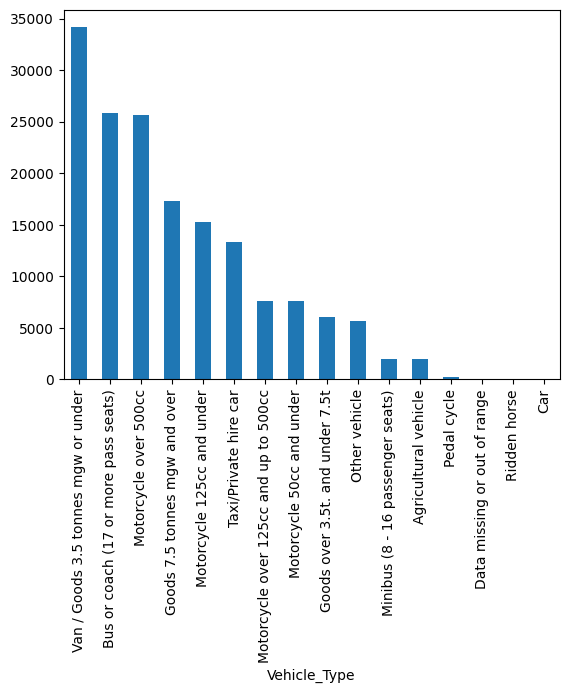

In [102]:
nocar_uk = uk[uk['Vehicle_Type'] != 'Car']
nocar_uk['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

<h1>Advanced Groupby Functions</h1>
<ul>
    <li>UNSTACK | unstack()</li>
    <li>RESET_INDEX | reset_index()</li>
</ul>

In [103]:
uk.dtypes

severity = uk.groupby(['Accident_Severity', 'Year']).size()
severity

Accident_Severity  Year
Fatal              2019      2714
                   2020      2341
                   2021      2057
                   2022      1549
Serious            2019     24322
                   2020     23121
                   2021     21997
                   2022     18777
Slight             2019    155079
                   2020    145129
                   2021    139500
                   2022    124093
dtype: int64

In [104]:
severity2 = uk.groupby(['Accident_Severity', 'Year']).size()
severity2.unstack()

Year,2019,2020,2021,2022
Accident_Severity,,,,
Fatal,2714,2341,2057,1549
Serious,24322,23121,21997,18777
Slight,155079,145129,139500,124093


In [105]:
severity3 = uk.groupby(['Accident_Severity', 'Year']).size()
severity3.unstack(level=0)

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


In [106]:
severity3 = uk.groupby(['Accident_Severity', 'Year']).size()
severity3.reset_index()

,Accident_Severity,Year,0
0,Fatal,2019,2714
1,Fatal,2020,2341
2,Fatal,2021,2057
3,Fatal,2022,1549
4,Serious,2019,24322
5,Serious,2020,23121
6,Serious,2021,21997
7,Serious,2022,18777
8,Slight,2019,155079
9,Slight,2020,145129


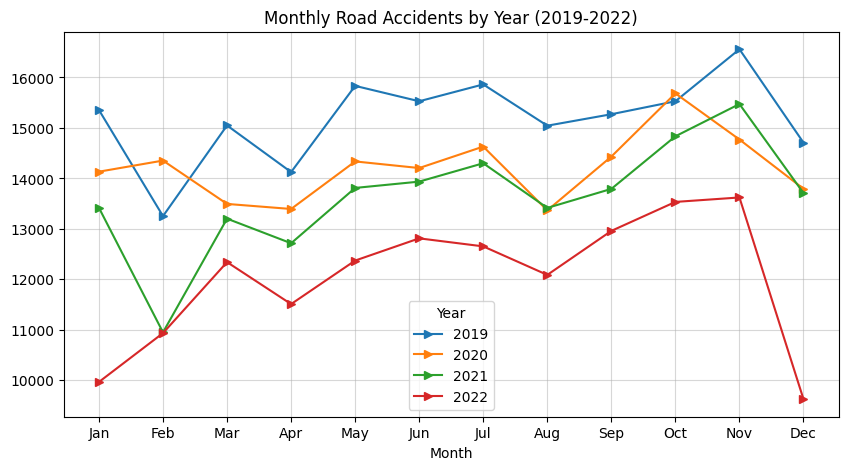

In [107]:
import matplotlib.pyplot as plt

# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = uk.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='>', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.bbox_to_achor(
plt.grid(alpha=0.5)
plt.show()

In [108]:
london_uk = uk[uk['District Area'] == 'City of London']

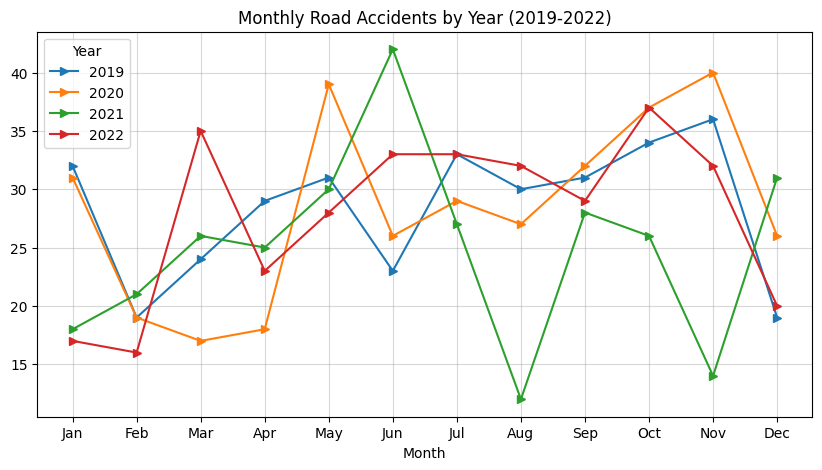

In [109]:
# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = london_uk.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='>', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#plt.bbox_to_achor(
plt.grid(alpha=0.5)
plt.show()

In [110]:
uk['District Area'].unique()

['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

<h1>PIE CHART IN MATPLOTLIB </h1>

In [111]:
severity = uk['Accident_Severity'].value_counts()

In [112]:
severity.index

CategoricalIndex(['Slight', 'Serious', 'Fatal'], categories=['Fatal', 'Serious', 'Slight'], ordered=False, dtype='category', name='Accident_Severity')

In [113]:
severity.values

array([563801,  88217,   8661])

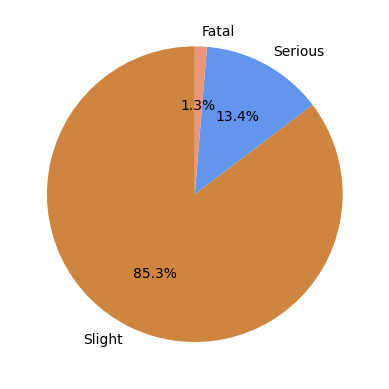

In [114]:
plt.pie(severity, 
        labels = severity.index,
        startangle= 90,
        autopct = '%1.1f%%',
        colors = ['Peru','Cornflowerblue','Darksalmon'])
plt.show()

<h1>Using District Area to make a comparison to  a general result</h1>

<h2>London Analysis</h2>

In [115]:
# df.dtypes
london_uk = uk[uk['District Area'] == 'City of London']

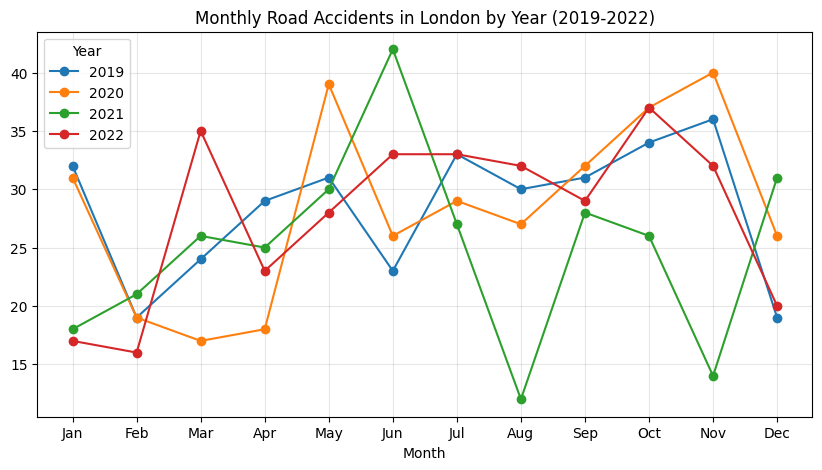

In [116]:
monthly_londondata = london_uk.groupby(['Year', 'Month']).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in London by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

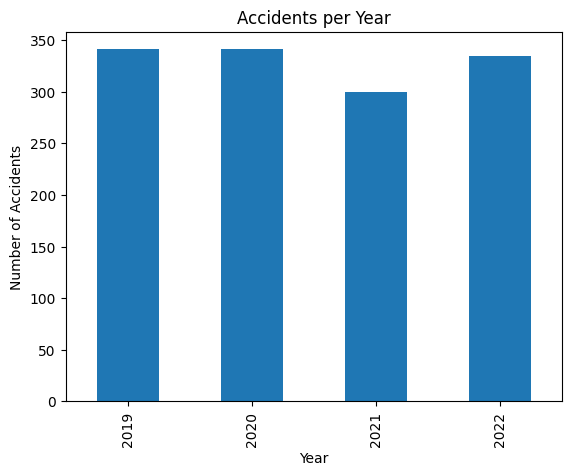

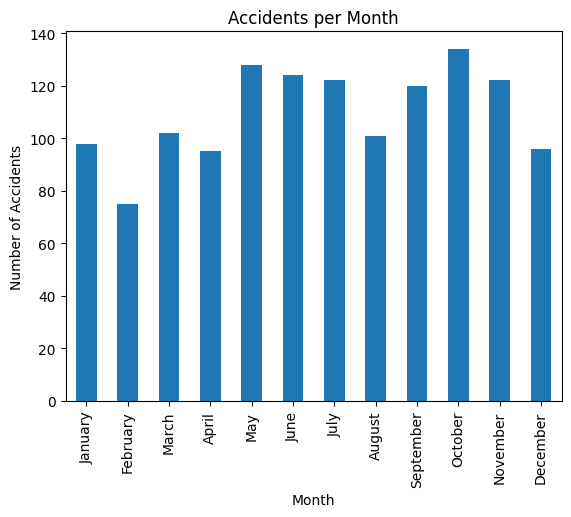

DayOfWeek
Monday        65
Tuesday      198
Wednesday    245
Thursday     244
Friday       249
Saturday     236
Sunday        80
Name: count, dtype: int64


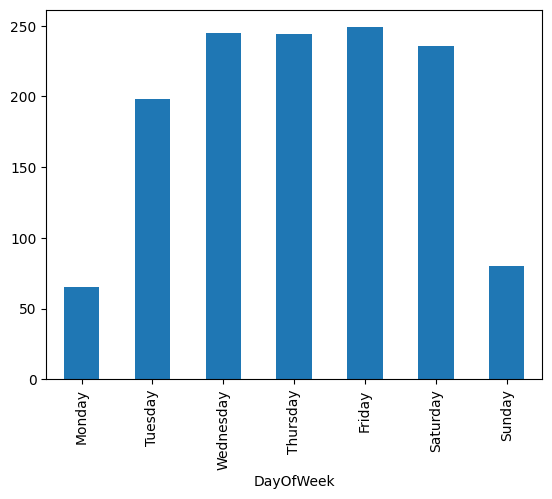

In [117]:
# Accidents per year
accidents_per_year = london_uk['Year'].value_counts().sort_index()
accidents_per_month = london_uk['Month'].value_counts().sort_index()
accidents_per_day = london_uk['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h1>Accident severity in London</h1>

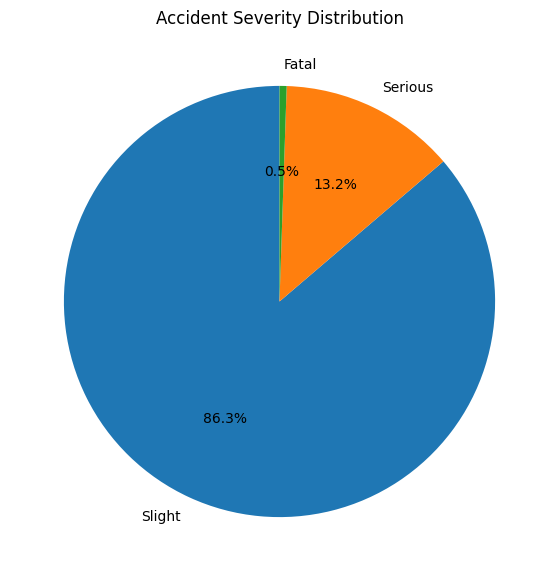

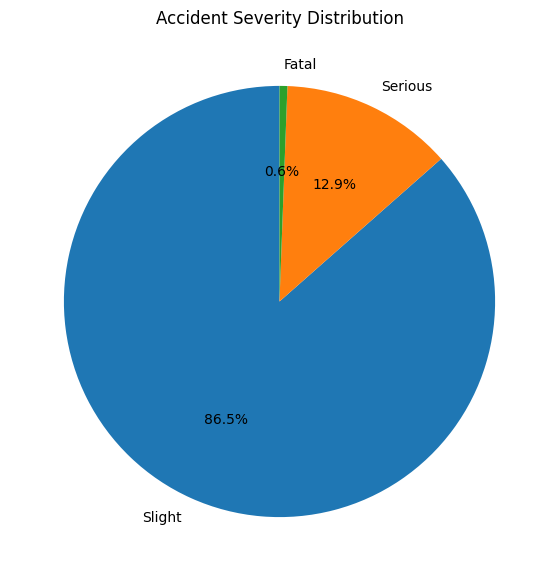

In [30]:
severity_london  = london_uk['Accident_Severity'].value_counts()

plt.pie(severity_london,
        labels = severity_london.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_london = london_uk[london_uk['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_london['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h1>GEOSPATIAL ANALYSIS</h1>

<h2>FOLIUM LIBRARY</h2>

In [88]:
# Step 1. Extract Latitude and longitude from the dataframe
# Convert to tuple and list
locations = list(zip(uk['Latitude'], uk['Longitude']))

# Step 2. Create a base map centered on a specific location.
# You can adjust the center and zoom level based on your data
m = folium.Map()

NameError: name 'Folium' is not defined

<h2>Poole Analysis</h2>

In [31]:
# df.dtypes
poole_uk = uk[uk['District Area'] == 'Poole']

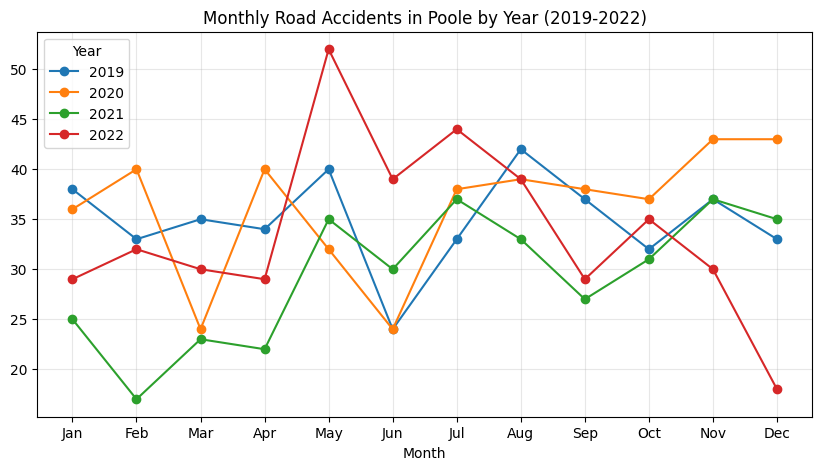

In [32]:
monthly_pooledata = poole_uk.groupby(['Year', 'Month']).size()

monthly_pooledata = monthly_pooledata.unstack(level=0)

monthly_pooledata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Poole by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2>Accident per year in Poole</h2>

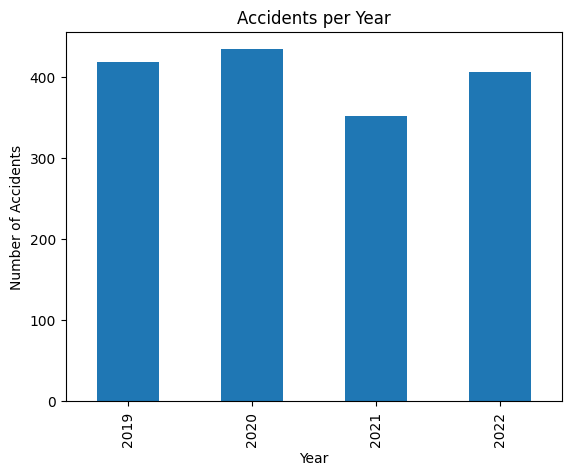

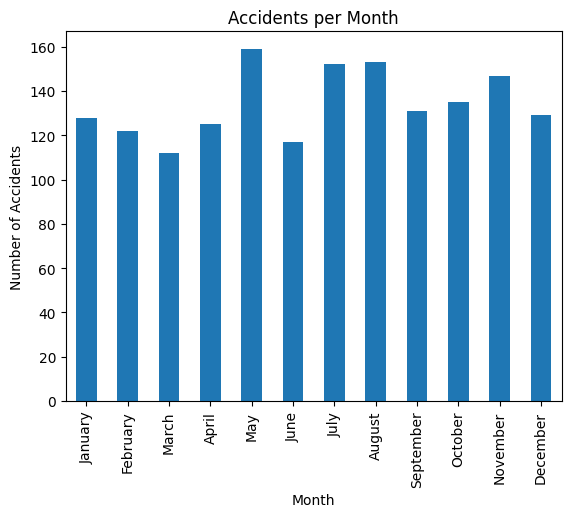

DayOfWeek
Monday       161
Tuesday      210
Wednesday    261
Thursday     248
Friday       269
Saturday     252
Sunday       209
Name: count, dtype: int64


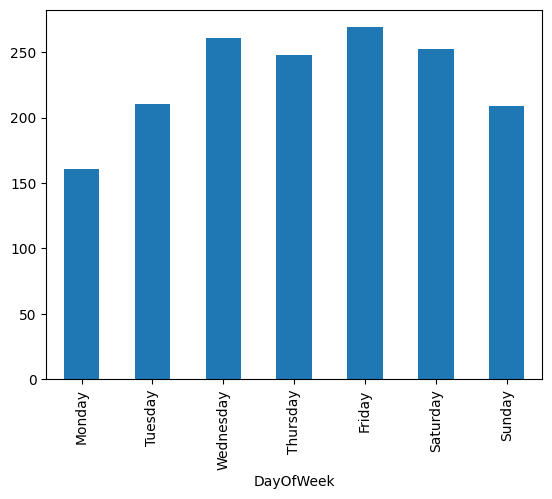

In [33]:
# Accidents per year
accidents_per_year = poole_uk['Year'].value_counts().sort_index()
accidents_per_month = poole_uk['Month'].value_counts().sort_index()
accidents_per_day = poole_uk['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h2>Accident Severity in Poole</h2>


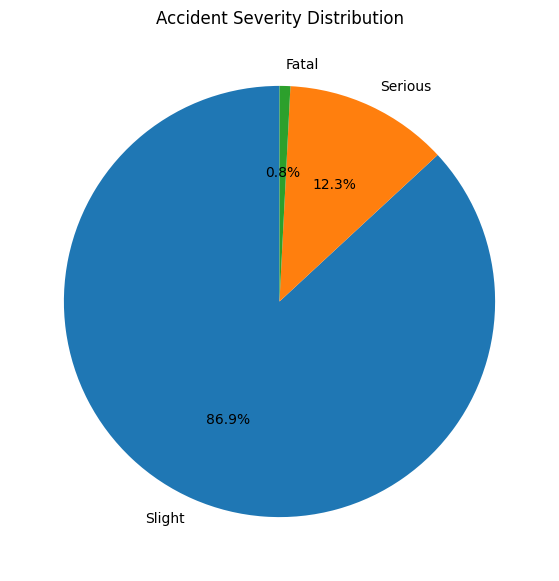

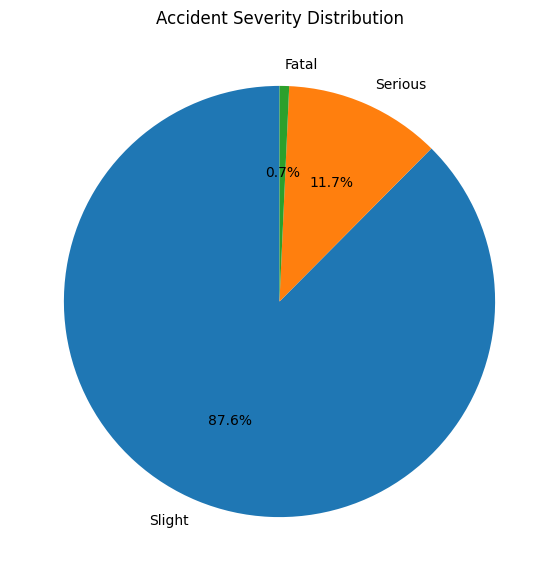

In [34]:
severity_poole  = poole_uk['Accident_Severity'].value_counts()

plt.pie(severity_poole,
        labels = severity_poole.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_poole = poole_uk[poole_uk['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_poole['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h3>Explanatory Data Analytics</h3>


<h4>QUESTION #1</h4>
<H5>What is the distribution of accident severities (Fatal, Serious, Slight) in the dataset?
</H5>

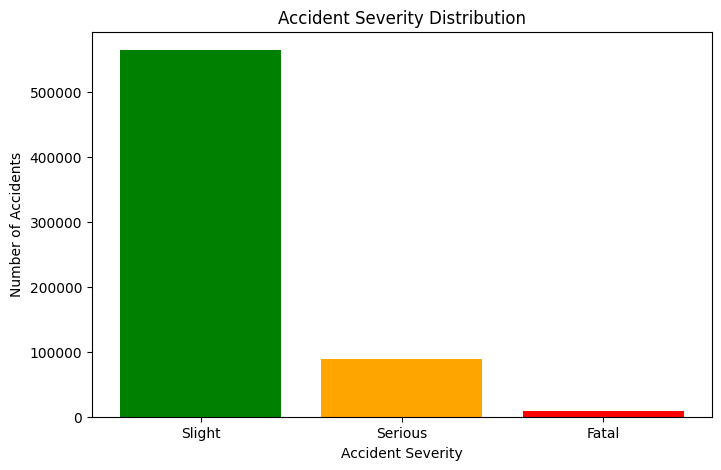

{'Slight': 563801, 'Serious': 88217, 'Fatal': 8661}

In [35]:
severity_distribution = uk['Accident_Severity'].value_counts()
severity_distribution

severity_distribution = {
    'Slight': 563801,
    'Serious': 88217,
    'Fatal': 8661
}
 
labels = list(severity_distribution.keys())
counts = list(severity_distribution.values())

plt.figure(figsize=(8,5))
plt.bar(labels, counts, color=['green', 'orange', 'red'])
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()
severity_distribution


<H4>INSIGHT #1</H4>
<h5>The proportion of different accident severities shown above helps in prioritizing safety measures.</h5>

<h4>QUESTION #2</h4>
<H5>Which district areas have the highest and lowest number of accidents?</H5>

In [36]:
accidents_by_district = uk['District Area'].value_counts()
accidents_by_district

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<H4>INSIGHT #2</H4>
<h5>The result above identifies Birmingham as the area with highest accidents while Clackmannanshire as the area with the lowest accident cases.This can help guide targeted interventions and resource allocation.</h5>

<h4>QUESTION #3</h4>
<H5>What is the average number of  casualties per accident?</H5>

In [37]:
avg_casualties = uk['Number_of_Casualties'].mean()
avg_casualties

np.float64(1.357040257068864)

<H4>INSIGHT #3</H4>
<h5>The average casualty count of about 1.36 per accident shows that accidents frequently involve multiple victims, emphasizing the need for comprehensive safety strategies and emergency response planning.
</h5>

<h4>QUESTION #4</h4>
<H5>What is the average number of vehicles involved in each accident?</H5>

In [38]:
avg_vehicles = uk['Number_of_Vehicles'].mean()
avg_vehicles

np.float64(1.8312554205597575)

<H4>INSIGHT #4</H4>
<h5>An average of about 1.83 vehicles per accident suggests that most accidents involve more than one vehicle, highlighting the importance of focusing on multi-vehicle collision prevention and response strategies.</h5>

<h4>QUESTION #5</h4>
<H5>How do various road surface conditions influence the number of accidents?</H5>

In [39]:
accidents_by_road_surface = uk['Road_Surface_Conditions'].value_counts()
accidents_by_road_surface

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<H4>INSIGHT #5</H4>
<h5>The result above shows that road surface conditions strongly influence accident frequency and risk. Dry surfaces has the highestnumber of accidents more likely because dry conditions are the most common. This means most driving happens on dry roads so naturally most accidents occur there.While other surfaces also have an alarming number of accidents, fafety measures such as improved road maintenance, driver warnings, and cautious driving behavior are critical during adverse surface conditions.


</h5>

<h4>QUESTION #6</h4>
<H5>Is there a significant difference in the number of accidents between urban and rural areas?</H5>

In [40]:
urban_rural_accidents = uk['Urban_or_Rural_Area'].value_counts()
urban_rural_accidents

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<H4>INSIGHT #6</H4>
<h5>The number of accidents in urban and rural areas differs significantly for about 182, 673 accidents. This difference is likely driven by higher traffic volumes and more complex road environments in urban settings.</h5>

<h4>QUESTION #7</h4>
<H5>Which weather conditions are associated with the highest number of accidents?</H5>

In [41]:
accidents_by_weather = uk['Weather_Conditions'].value_counts()
accidents_by_weather

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<H4>INSIGHT #7</H4>
<h5>Rhe result above shows that weather conditions strongly influence accident occurrence.Fine weather accounts for most accidents probably due to higher exposure.Meanwhile, rain, snow, fog, and high winds has increasing accident risk and require targeted safety measures.</h5>

<h4>QUESTION #8</h4>
<H5>What vehicle type is most frequently involved in accidents?</H5>

In [42]:
most_common_vehicle = uk['Vehicle_Type'].value_counts().head(5)
most_common_vehicle

Vehicle_Type
Car                                     497992
Van / Goods 3.5 tonnes mgw or under      34160
Bus or coach (17 or more pass seats)     25878
Motorcycle over 500cc                    25657
Goods 7.5 tonnes mgw and over            17307
Name: count, dtype: int64

<H4>INSIGHT #8</H4>
<h5>The data above indicates that cars are the most frequent type of vehicle that gets involve in accidents at UK with the total of 497,992 accidents recorded during the year that this data is recorded.</h5>

<h4>QUESTION #9</h4>
<H5>How does accident severity vary across different road types?</H5>

In [43]:
severity_by_road_type = uk.groupby('Road_Type')['Accident_Severity'].value_counts().unstack(fill_value=0)
severity_by_road_type

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1815,11746,85863
One way street,95,1655,11809
Roundabout,142,3665,40185
Single carriageway,6560,70540,419563
Slip road,49,611,6381


<H4>INSIGHT #9</H4>
<h5>It is evident that accident severity varies by road type, with single carriageways having the highest counts of fatal, serious, and slight accidents.Dual carriageways have fewer accidents but still significant numbers, mostly slight severity.Roundabouts, one-way streets, and slip roads have fewer and generally less severe accidents.Overall, road design and traffic flow is likely to influence accident severity patterns.</h5>

<h4>QUESTION #10</h4>
<H5>How does accident severity vary under different weather conditions?</H5>

In [44]:
severity_by_weather = uk.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack(fill_value=0)
severity_by_weather

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7207,73285,454521
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


<H4>INSIGHT #10</H4>
<h5>Accident severity varies with weather conditions, with fine weather showing the highest number of accidents.This is expected since most driving happens in good weather conditions, leading to higher exposure.Adverse weather conditions (rain, fog, snow, high winds) are associated with a higher proportion of serious and fatal accidents relative to their frequency.Drivers should exercise increased caution during adverse weather to reduce accident severity.Road safety measures and warnings should target these higher-risk weather conditions.</h5>

<h4>QUESTION #11</h4>
<H5>How does accident severity vary under different light condition?</H5>

In [45]:
severity_by_light = uk.groupby('Light_Conditions')['Accident_Severity'].value_counts().unstack(fill_value=0)
severity_by_light

Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,68,794,5622
Darkness - lights lit,1860,19130,108345
Darkness - lights unlit,45,360,2138
Darkness - no lighting,1612,7174,28651
Daylight,5076,60759,419045


<H4>INSIGHT #11</H4>
<h5>Accident severity varies with light conditions, with most accidents occurring during daylight due to exposure.Darkness, especially with no lighting or lights lit, is associated with a higher proportion of fatal and serious accidents relative to daylight.Poor visibility in darkness likely contributes to increased accident severity.Improving road lighting and driver awareness during dark conditions could help reduce accident severity.</h5>

<h4>QUESTION #12</h4>
<H5>What are the top 5 district areas with the highest number of seious accidents?</H5>

In [46]:
serious_accidents_by_district = uk[uk['Accident_Severity'] == 'Serious']['District Area'].value_counts()
serious_accidents_by_district

District Area
Birmingham                   1474
Leeds                        1147
Westminster                   926
Bradford                      802
Sheffield                     749
                             ... 
Oswestry                       23
Orkney Islands                 19
Clackmannanshire               18
Shetland Islands               15
London Airport (Heathrow)       9
Name: count, Length: 422, dtype: int64

<H4>INSIGHT #12</H4>
<h5>The data above shows that the top 5 district areas with highest number of serious accidents are Birmingham, Leeds, Westminster, Bradford, and Sheffield respectively.</h5>

<h4>QUESTION #13</h4>
<H5>Which vehicle type contribute to the highest total number of casualties?</H5>

In [47]:
casualties_by_vehicle_type = uk.groupby('Vehicle_Type')['Number_of_Casualties'].sum().sort_values(ascending=False)
casualties_by_vehicle_type

Vehicle_Type
Car                                      676692
Van / Goods 3.5 tonnes mgw or under       46271
Bus or coach (17 or more pass seats)      34915
Motorcycle over 500cc                     34879
Goods 7.5 tonnes mgw and over             23397
Motorcycle 125cc and under                20348
Taxi/Private hire car                     18195
Motorcycle over 125cc and up to 500cc     10286
Motorcycle 50cc and under                 10167
Goods over 3.5t. and under 7.5t            8308
Other vehicle                              7554
Minibus (8 - 16 passenger seats)           2659
Agricultural vehicle                       2613
Pedal cycle                                 270
Data missing or out of range                  9
Ridden horse                                  5
Name: Number_of_Casualties, dtype: int64

<H4>INSIGHT #13</H4>
<h5>The result shows that cars are the primary contributors to the highest number of casualties, reflecting their prevalence on roads.Vans, goods vehicles, buses, and motorcycles also contribute significantly to casualties.Targeted safety measures for these vehicle types could have the greatest impact on reducing casualties.</h5>

<h4>QUESTION #14</h4>
<H5>How many accidents involved more than one casualties?</H5>

In [48]:
multi_casualty_accidents = uk[uk['Number_of_Casualties'] > 1].shape[0]
multi_casualty_accidents

156638

<H4>INSIGHT #14</H4>
<h5>The data returns a total of 156,638 accidents that involved more than one casualties.</h5>

<h4>QUESTION #15</h4>
<H5>How many accidents involved more than two vehicles?</H5>

In [49]:
multi_vehicle_accidents = uk[uk['Number_of_Vehicles'] > 2].shape[0]
multi_vehicle_accidents

67897

<H4>INSIGHT #15</H4>
<h5>There are 67897 accidents that involves more than two vehicles</h5>

<h4>QUESTION #16</h4>
<H5>What are the most common road surface conditions during fatal accidents?</H5>

In [50]:
fatal_accidents_road_surface = uk[uk['Accident_Severity'] == 'Fatal']['Road_Surface_Conditions'].value_counts()
fatal_accidents_road_surface

Road_Surface_Conditions
Dry                     5790
Wet or damp             2620
Frost or ice             193
Snow                      35
Flood over 3cm. deep      23
Name: count, dtype: int64

<H4>INSIGHT #16</H4>
<h5>Dry road surfaces are the most common condition during fatal accidents, reflecting high exposure. Wet or damp conditions also contribute substantially to fatal accidents, highlighting the increased danger of reduced traction.Hazardous conditions like frost, ice, snow, and flooding cause fewer fatal accidents but represent significant risks when present.Road safety efforts should focus on driver awareness and caution during adverse surface conditions, especially wet, icy, and flooded roads.</h5>

<h4>QUESTION #17</h4>
<H5>What are the most common light conditions during fatal accidents?</H5>

In [51]:
fatal_accidents_light_conditions = uk[uk['Accident_Severity'] == 'Fatal']['Light_Conditions'].value_counts()
fatal_accidents_light_conditions

Light_Conditions
Daylight                       5076
Darkness - lights lit          1860
Darkness - no lighting         1612
Darkness - lighting unknown      68
Darkness - lights unlit          45
Name: count, dtype: int64

<H4>INSIGHT #17</H4>
<h5>Most fatal accidents occur during daylight, reflecting higher traffic volume and exposure. Darkness, both with lights lit and no lighting, also accounts for a substantial number of fatal accidents, highlighting the increased risk in low visibility conditions.Improving lighting and driver awareness during dark conditions could help reduce fatal accidents.
</h5>

<h4>QUESTION #18</h4>
<H5>What are the most common weather conditions during serious accidents?</H5>

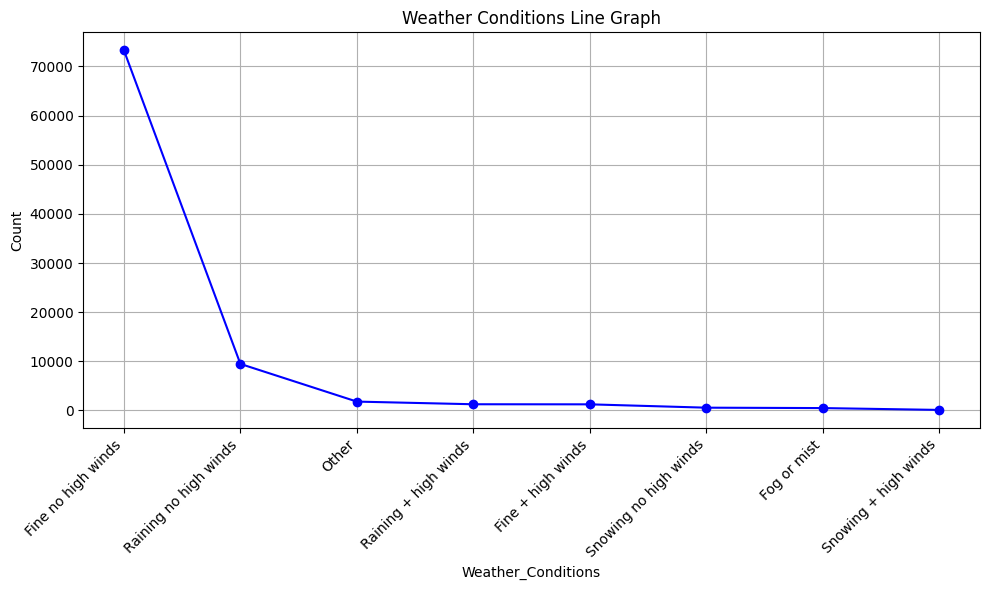

In [52]:


Weather_Conditions = [
    "Fine no high winds",
    "Raining no high winds",
    "Other",
    "Raining + high winds",
    "Fine + high winds",
    "Snowing no high winds",
    "Fog or mist",
    "Snowing + high winds"
]

values = [73285, 9468, 1801, 1261, 1245, 565, 483, 109]


plt.figure(figsize=(10, 6))
plt.plot(Weather_Conditions, values, marker='o', linestyle='-', color='b')
plt.xticks(rotation=45, ha='right')
plt.title('Weather Conditions Line Graph')
plt.xlabel('Weather_Conditions')
plt.ylabel('Count')
plt.tight_layout()
plt.grid(True)
plt.show()

<H4>INSIGHT #18</H4>
<h5>The most common weather condition during serious accidents is "Fine no high winds" with 72,046 incidents, indicating that most serious accidents occur in clear weather likely due to higher traffic volumes. Raining conditions (with or without high winds) are the next most frequent, totaling 10,729 accidents, showing that wet weather also significantly contributes to serious accidents. Other adverse conditions like snow, fog, and high winds are less common but still present risks.






</h5>

<h4>QUESTION #19</h4>
<H5>How many accidents occured in 'DRY' road surfaces?</H5>

In [53]:
len(uk[uk['Road_Surface_Conditions'] == 'Dry'])

448547

<H4>INSIGHT #19</H4>
<h5>The total number of accident that took place at dry surfaces is 448547. That huge number of accidents suggest that even dry roads does not guarantee safe driving. </h5>

<h4>QUESTION #20</h4>
<H5>How many accidents involved a motorcycle over 500cc?</H5>

In [54]:
uk[uk['Vehicle_Type'] == 'Motorcycle over 500cc'].shape[0]

25657

<H4>INSIGHT #20</H4>
<h5>Motorcycles over 500cc were involved in 25,657 accidents, showing their notable presence in traffic incidents. </h5>

<h4>QUESTION #21</h4>
<H5>Which month has the highest number of accidents?</H5>

In [55]:
# uk["Month"] = uk["Accident Date"].dt.month_name()
# accidents_per_month = uk["Month"].value_counts().sort_index()
# accidents_per_month


uk = pd.DataFrame(data)

data = {
    'Month': ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September'],
    'Accidents': [51744, 53913, 51836, 49491, 52872, 57445, 56481, 54086, 56352, 60424, 59580, 56455]
}

uk_sorted = uk.sort_values('Accidents', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(uk_sorted['Month'], uk_sorted['Accidents'], color='skyblue')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

max_accidents = uk_sorted['Accidents'].max()
max_month = uk_sorted[uk_sorted['Accidents'] == max_accidents]['Month'].values[0]
max_index = uk_sorted.index[uk_sorted['Accidents'] == max_accidents][0]
# bars[max_index].set_color('orange')

plt.text(max_index, max_accidents + 500, f'Highest: {max_month}', ha='center', color='orange', fontweight='bold')
plt.show()


NameError: name 'data' is not defined

<H4>INSIGHT #21</H4>
<h5> <strong>The highest Accident Month is November</strong>,likely due to shorter daylight hours, rainy/wet roads, and increased travel before the holidays. Other higher accident month includes <strong>October and July</strong>. Ocotber's autumn weather such as the fog, rain and darker evenings in UK may increase the risk of accidents while during July, peak summer travel and tourism acitivities increased road accidents.</h5>

<h4>QUESTION #22</h4>
<H5>On which day of the week do most accidents happen?</H5>

In [ ]:
uk["DayOfWeek"] = uk["Accident Date"].dt.day_name()
accidents_per_day = uk["DayOfWeek"].value_counts()
accidents_per_day

<H4>INSIGHT #22</H4>
<h5>The data indicates that in the UK, road accidents occur most frequently on Saturdays (107,178 cases), while Mondays report the fewest accidents (72,680 cases). This pattern reflects common travel behavior in the UK. </h5>
    
<h6>Insight 22.1. Saturdays often involve more leisure travel, shopping, nightlife, and long-distance trips, which increases exposure to road risks.</h6>
<h6>Insight 22.2. Alcohol-related incidents also tend to be higher on weekends, contributing to the rise in Saturday accidents.</h6>
<h6>Insight 22.3. Mondays have the lowest accident numbers, likely because traffic is more routine (commuting to work/school), and drivers are generally more cautious after the weekend.</h6>

